In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e25/sample_submission.csv
/kaggle/input/playground-series-s3e25/train.csv
/kaggle/input/playground-series-s3e25/test.csv


In [25]:
# Reading csv files
df1= pd.read_csv("/kaggle/input/playground-series-s3e25/train.csv")
df2= pd.read_csv("/kaggle/input/playground-series-s3e25/test.csv")

In [26]:
df1.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,0.496070,0.91457,6.0
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,0.492719,0.71760,6.5
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,0.481478,1.50633,2.5
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,0.489272,0.78937,6.0
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,0.492736,1.86481,6.0


In [27]:
df2.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,10407,884.0,121.420000,35.36,5.28,82.561240,9.370384,2.298,1.9072,1.200000,0.461899,1.79459
1,10408,90.0,9.931960,18.00,5.60,39.568056,12.086300,2.868,1.6520,0.864000,0.476196,1.41194
2,10409,116.0,7.767992,11.60,4.80,23.231818,11.023840,2.644,1.7940,0.960000,0.499514,0.78834
3,10410,100.0,9.107996,10.00,4.80,20.298893,12.086300,2.828,1.6620,0.792000,0.495796,1.20466
4,10411,55.0,4.030000,11.00,4.00,22.977675,11.280950,2.455,1.7500,0.893333,0.476095,0.93456


In [28]:
df1.shape,df2.shape

((10407, 13), (6939, 12))

In [ ]:
# test datasında Hardness sütunu yok bizim tahmin etmemiz isteniyor

In [29]:
df1.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
Hardness                 0
dtype: int64

In [30]:
df1.corr()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average,Hardness
id,1.000000,-0.019038,-0.005849,0.001863,-0.003501,0.002035,-0.019492,-0.015554,-0.003115,0.003888,-0.013690,0.006337,-0.006989
allelectrons_Total,-0.019038,1.000000,0.616092,0.074725,0.071618,0.078489,0.034883,0.036897,0.038551,0.024420,0.031035,0.058067,-0.061687
density_Total,-0.005849,0.616092,1.000000,0.356399,0.083640,0.355614,-0.104870,-0.075535,0.202331,0.240787,-0.089792,0.336046,-0.161524
allelectrons_Average,0.001863,0.074725,0.356399,1.000000,0.004376,0.990660,-0.360046,-0.319413,0.550669,0.688680,-0.328973,0.803641,-0.400496
val_e_Average,-0.003501,0.071618,0.083640,0.004376,1.000000,0.001860,0.453901,0.550007,0.354538,0.189352,0.093854,-0.068899,0.161715
atomicweight_Average,0.002035,0.078489,0.355614,0.990660,0.001860,1.000000,-0.356640,-0.316053,0.529277,0.666165,-0.327459,0.796564,-0.402948
ionenergy_Average,-0.019492,0.034883,-0.104870,-0.360046,0.453901,-0.356640,1.000000,0.774050,0.078650,-0.235344,0.638616,-0.359735,0.203203
el_neg_chi_Average,-0.015554,0.036897,-0.075535,-0.319413,0.550007,-0.316053,0.774050,1.000000,0.121926,-0.174485,0.441195,-0.322099,0.290352
R_vdw_element_Average,-0.003115,0.038551,0.202331,0.550669,0.354538,0.529277,0.078650,0.121926,1.000000,0.811823,0.002984,0.439990,-0.061402
R_cov_element_Average,0.003888,0.024420,0.240787,0.688680,0.189352,0.666165,-0.235344,-0.174485,0.811823,1.000000,-0.221164,0.571741,-0.189111


In [31]:
import matplotlib.pyplot as plt

In [32]:
import seaborn as sns

<Axes: >

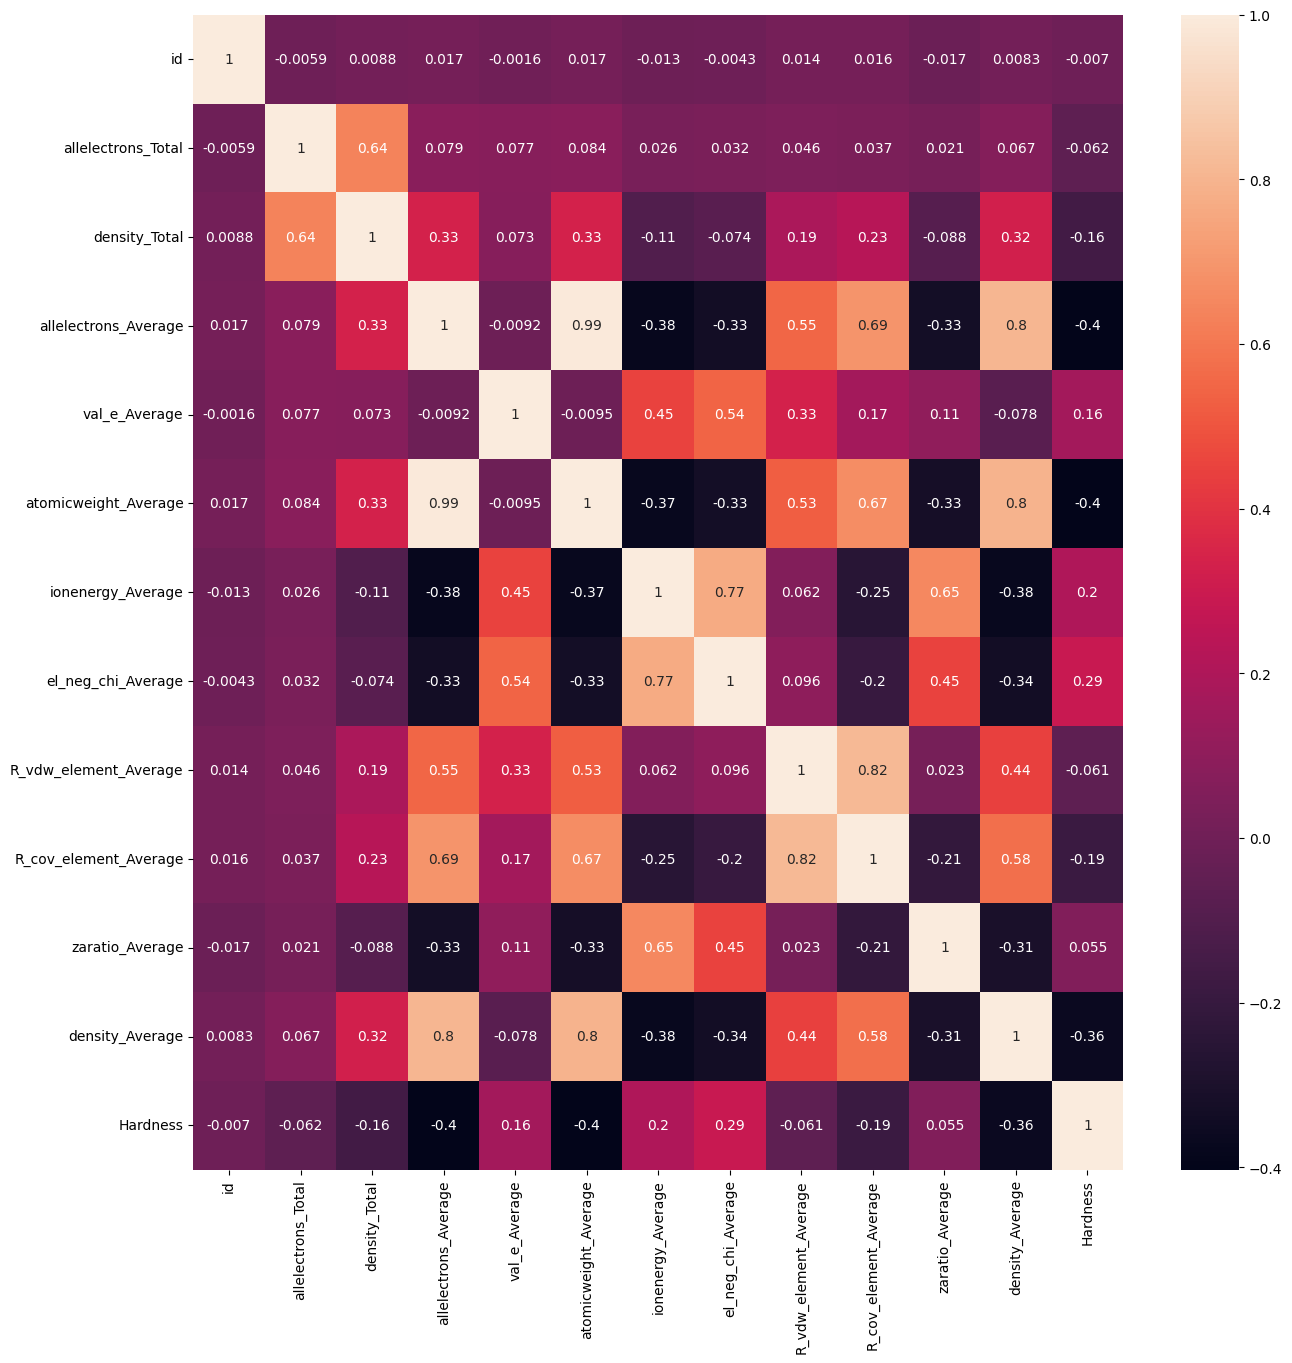

In [33]:
ax=plt.figure(figsize=(15,15));
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [34]:
df2.isnull().sum()

id                       0
allelectrons_Total       0
density_Total            0
allelectrons_Average     0
val_e_Average            0
atomicweight_Average     0
ionenergy_Average        0
el_neg_chi_Average       0
R_vdw_element_Average    0
R_cov_element_Average    0
zaratio_Average          0
density_Average          0
dtype: int64

In [35]:
#Her iki datada da boş veri bulunmuyor

In [36]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10407 entries, 0 to 10406
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10407 non-null  int64  
 1   allelectrons_Total     10407 non-null  float64
 2   density_Total          10407 non-null  float64
 3   allelectrons_Average   10407 non-null  float64
 4   val_e_Average          10407 non-null  float64
 5   atomicweight_Average   10407 non-null  float64
 6   ionenergy_Average      10407 non-null  float64
 7   el_neg_chi_Average     10407 non-null  float64
 8   R_vdw_element_Average  10407 non-null  float64
 9   R_cov_element_Average  10407 non-null  float64
 10  zaratio_Average        10407 non-null  float64
 11  density_Average        10407 non-null  float64
 12  Hardness               10407 non-null  float64
dtypes: float64(12), int64(1)
memory usage: 1.0 MB


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     6939 non-null   int64  
 1   allelectrons_Total     6939 non-null   float64
 2   density_Total          6939 non-null   float64
 3   allelectrons_Average   6939 non-null   float64
 4   val_e_Average          6939 non-null   float64
 5   atomicweight_Average   6939 non-null   float64
 6   ionenergy_Average      6939 non-null   float64
 7   el_neg_chi_Average     6939 non-null   float64
 8   R_vdw_element_Average  6939 non-null   float64
 9   R_cov_element_Average  6939 non-null   float64
 10  zaratio_Average        6939 non-null   float64
 11  density_Average        6939 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 650.7 KB


In [38]:
# DRY Dont repeat yuorself-Bir işi iki sefer yapma

In [39]:
df1.shape,df2.shape

#df2  df1 e göre 1 tane eksik. bziden bunu tahmin etmemiz isteniyor

((10407, 13), (6939, 12))

In [41]:
x=df1.drop('Hardness',axis=1)
y=df1['Hardness']

In [42]:
x=pd.get_dummies(x,drop_first=True)

#sözel verileri sayısal veriye çevirdik

In [95]:
x.drop(["id"],axis=1,inplace=True)

In [96]:
x

,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
0,100.0,0.841611,10.000000,4.800000,20.612526,11.088100,2.766000,1.732000,0.860000,0.496070,0.91457
1,100.0,7.558488,10.000000,4.800000,20.298893,12.040830,2.755000,1.631000,0.910000,0.492719,0.71760
2,76.0,8.885992,15.600000,5.600000,33.739258,12.086300,2.828000,1.788000,0.864000,0.481478,1.50633
3,100.0,8.795296,10.000000,4.800000,20.213349,10.948500,2.648000,1.626000,0.936000,0.489272,0.78937
4,116.0,9.577996,11.600000,4.800000,24.988133,11.824480,2.766000,1.682000,0.896000,0.492736,1.86481
...,...,...,...,...,...,...,...,...,...,...,...
10402,128.0,7.558488,12.000000,4.000000,26.385218,11.330440,2.644000,1.631000,0.892000,0.496070,1.79607
10403,30.0,1.743160,10.000000,5.333333,20.766935,14.163933,3.090000,1.556667,0.866667,0.480390,0.81480
10404,196.0,30.920000,24.500000,5.500000,53.490297,10.074300,2.295000,1.545000,1.120000,0.469715,2.11540
10405,38.0,1.553160,12.666667,4.666667,26.621687,11.290033,2.743333,1.756667,0.980000,0.486507,0.77755


In [97]:
y

0        6.0
1        6.5
2        2.5
3        6.0
4        6.0
        ... 
10402    4.0
10403    5.0
10404    1.8
10405    6.0
10406    6.5
Name: Hardness, Length: 10407, dtype: float64

In [98]:
import tensorflow as tf

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [102]:
model=Sequential()
model.add(Dense(190,activation='relu'))
model.add(Dense(190,activation='relu'))
model.add(Dense(190,activation='relu'))
model.add(Dense(190,activation='relu'))
model.add(Dense(190,activation='relu'))
model.add(Dense(1))   #regression olduğu için sadece Dense(1) yazdık. Tek bir değer tahmin edeceğiz
model.compile(loss='mse', optimizer='adam')  #mes mean_squared_error

In [103]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=300)

Epoch 1/300
66/66 [==============================] - 2s 9ms/step - loss: 19.3633 - val_loss: 5.7009
Epoch 2/300
66/66 [==============================] - 0s 6ms/step - loss: 8.6536 - val_loss: 3.0097
Epoch 3/300
66/66 [==============================] - 0s 7ms/step - loss: 5.1935 - val_loss: 6.5062
Epoch 4/300
66/66 [==============================] - 0s 6ms/step - loss: 5.2685 - val_loss: 2.8126
Epoch 5/300
66/66 [==============================] - 0s 6ms/step - loss: 3.8483 - val_loss: 2.9895
Epoch 6/300
66/66 [==============================] - 0s 6ms/step - loss: 2.3143 - val_loss: 6.7178
Epoch 7/300
66/66 [==============================] - 0s 6ms/step - loss: 2.8330 - val_loss: 5.6907
Epoch 8/300
66/66 [==============================] - 0s 6ms/step - loss: 2.4563 - val_loss: 3.1427
Epoch 9/300
66/66 [==============================] - 0s 6ms/step - loss: 2.1390 - val_loss: 2.0862
Epoch 10/300
66/66 [==============================] - 0s 6ms/step - loss: 2.4973 - val_loss: 2.4051
Epoch 11

In [104]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 190)               2280      
                                                                 
 dense_16 (Dense)            (None, 190)               36290     
                                                                 
 dense_17 (Dense)            (None, 190)               36290     
                                                                 
 dense_18 (Dense)            (None, 190)               36290     
                                                                 
 dense_19 (Dense)            (None, 190)               36290     
                                                                 
 dense_20 (Dense)            (None, 1)                 191       
                                                                 
Total params: 147631 (576.68 KB)
Trainable params: 147

In [105]:
loss_df=pd.DataFrame(model.history.history)

<Axes: >

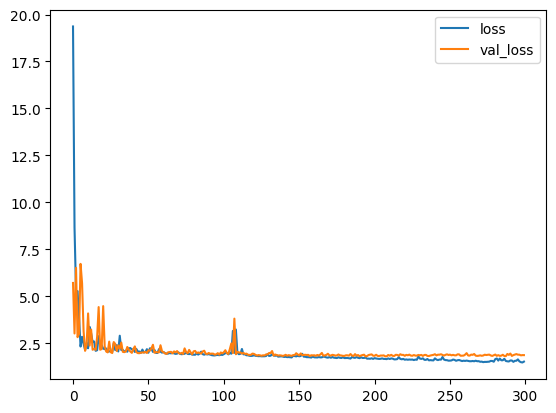

In [106]:
loss_df.plot()

In [107]:
tahmin=model.predict(x_test)

66/66 [==============================] - 0s 2ms/step


In [108]:
from sklearn.metrics import mean_squared_error,r2_score

In [109]:
r2_score(y_test,tahmin)
#BURAYA KADAR DERSTEKİ KODLARI KULLNADIK
#sonuç %80 nin altında olduğu için yeni bir deeplearning uygalamak istiyoruz

0.31698770593273395

In [110]:
mean_squared_error(y_test,tahmin)**.5

1.3625258547621204

In [2]:
#BURDAN SONRASI KAGGLE DA ÇÖZÜLMÜŞ BİR PROJEDEN YARDIM AKINDI


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [61]:
from sklearn.linear_model import LinearRegression
import xgboost as xg 

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import Input

In [63]:
train = pd.read_csv('/kaggle/input/playground-series-s3e25/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e25/test.csv')

In [73]:
def imp_feat(df):
    df['feat1'] = df['ionenergy_Average']/(df['allelectrons_Average']+1)
    df['feat2'] = df['el_neg_chi_Average']/(df['allelectrons_Average']+1)
    df['feat3'] = df['el_neg_chi_Average']/(df['atomicweight_Average']+1)
    df['feat4'] = df['ionenergy_Average']+df['zaratio_Average']
    df['feat5'] = df['zaratio_Average']/(df['allelectrons_Average']+1)
    df['feat6'] = df['R_vdw_element_Average']/(df['allelectrons_Average']+1)
    return df

In [74]:
train = imp_feat(train)
test = imp_feat(test)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error

In [76]:
X = train.drop(columns=['id', 'Hardness'])
y = train['Hardness']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=0)

In [77]:
regression = LinearRegression()
regression.fit(X_train, y_train)
reg_pred = regression.predict(X_test)
reg_mae = median_absolute_error(y_test, reg_pred)

In [78]:
xgb_rr = xg.XGBRegressor(objective ='reg:squarederror', 
                  n_estimators = 10, seed = 123)
xgb_rr.fit(X_train, y_train) 
xgb_rr_pred = xgb_rr.predict(X_test)
xgb_rr_mae = median_absolute_error(y_test, xgb_rr_pred)

In [79]:
print(f'Mean Absolute Error for Linear Regression is:{reg_mae: .6f}')
print(f'Mean Absolute Error for XGBRegressor  with reg:squarederror is:{xgb_rr_mae: .6f}')

Mean Absolute Error for Linear Regression is: 0.982529
Mean Absolute Error for XGBRegressor  with reg:squarederror is: 0.713656


In [80]:
feat_imp = pd.DataFrame({
    'feature': X.columns,
    'importance' : xgb_rr.feature_importances_
})
feat_imp = feat_imp.sort_values(by='importance', ascending = False)
feat_imp.head(20)

,feature,importance
11,feat1,0.219147
13,feat3,0.210960
14,feat4,0.174520
12,feat2,0.126631
15,feat5,0.046122
3,val_e_Average,0.029836
9,zaratio_Average,0.026332
4,atomicweight_Average,0.025491
5,ionenergy_Average,0.025133
16,feat6,0.021682


In [81]:
train['Hardness_linreg'] = regression.predict(X)
train['Hardness_xgb'] = xgb_rr.predict(X)

In [82]:
train.head()

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,...,density_Average,Hardness,feat1,feat2,feat3,feat4,feat5,feat6,Hardness_linreg,Hardness_xgb
0,0,100.0,0.841611,10.0,4.8,20.612526,11.08810,2.766,1.732,0.860,...,0.91457,6.0,1.008009,0.251455,0.127981,11.584170,0.045097,0.157455,5.480976,5.820466
1,1,100.0,7.558488,10.0,4.8,20.298893,12.04083,2.755,1.631,0.910,...,0.71760,6.5,1.094621,0.250455,0.129349,12.533549,0.044793,0.148273,5.040213,5.214417
2,2,76.0,8.885992,15.6,5.6,33.739258,12.08630,2.828,1.788,0.864,...,1.50633,2.5,0.728090,0.170361,0.081406,12.567778,0.029005,0.107711,5.318907,4.107006
3,3,100.0,8.795296,10.0,4.8,20.213349,10.94850,2.648,1.626,0.936,...,0.78937,6.0,0.995318,0.240727,0.124827,11.437772,0.044479,0.147818,5.014144,5.653656
4,4,116.0,9.577996,11.6,4.8,24.988133,11.82448,2.766,1.682,0.896,...,1.86481,6.0,0.938451,0.219524,0.106433,12.317216,0.039106,0.133492,5.051867,5.270324


In [83]:
X = train.drop(columns=['id', 'Hardness'])
y = train['Hardness']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

In [85]:
layer = Normalization()
layer.adapt(X_train)
input_size = X_train.shape[1]

In [86]:
model = Sequential()
model.add(Input(shape=(input_size,)))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1))

In [87]:
model.compile(optimizer ='adam', loss= 'mean_absolute_error')

In [88]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [89]:
monitor_loss = EarlyStopping(monitor='val_loss', patience=10)
reduction = ReduceLROnPlateau(monitor='val_loss',factor=0.9, patience=3, min_lr=0.00001)

In [90]:
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_split=0.2, callbacks=[monitor_loss, reduction])

Epoch 1/100
53/53 [==============================] - 2s 7ms/step - loss: 4.4631 - val_loss: 7.0281 - lr: 0.0010
Epoch 2/100
53/53 [==============================] - 0s 4ms/step - loss: 3.8627 - val_loss: 5.5225 - lr: 0.0010
Epoch 3/100
53/53 [==============================] - 0s 4ms/step - loss: 2.9176 - val_loss: 2.7595 - lr: 0.0010
Epoch 4/100
53/53 [==============================] - 0s 3ms/step - loss: 1.7927 - val_loss: 1.3721 - lr: 0.0010
Epoch 5/100
53/53 [==============================] - 0s 4ms/step - loss: 1.1038 - val_loss: 1.1545 - lr: 0.0010
Epoch 6/100
53/53 [==============================] - 0s 3ms/step - loss: 0.9533 - val_loss: 0.9446 - lr: 0.0010
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - loss: 0.9166 - val_loss: 0.9131 - lr: 0.0010
Epoch 8/100
53/53 [==============================] - 0s 3ms/step - loss: 0.8879 - val_loss: 0.8610 - lr: 0.0010
Epoch 9/100
53/53 [==============================] - 0s 3ms/step - loss: 0.8816 - val_loss: 0.8469 - lr:

In [91]:
model.evaluate(X_test, y_test)

66/66 [==============================] - 0s 2ms/step - loss: 0.8150


0.8149844408035278

In [92]:
pred_data = test.drop(columns=['id'])
test['Hardness_linreg'] = regression.predict(pred_data)
test['Hardness_xgb'] = xgb_rr.predict(pred_data)

In [93]:
preds = model.predict(test.drop(columns = ['id']))
submission_overkill = pd.DataFrame({
    'id':test['id'],
    'Hardness':preds.flatten()
})
submission_overkill.head()

217/217 [==============================] - 0s 1ms/step


,id,Hardness
0,10407,2.154061
1,10408,2.495659
2,10409,5.886238
3,10410,3.777575
4,10411,4.827731


In [94]:
submission_overkill.to_csv('submission.csv', index=False)